<a href="https://colab.research.google.com/github/SeongWoong-Hong/TA_session/blob/master/PytorchBasic/PytorchBasic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pytorch Basic 2**

Now we solve the regression problem that finding the weight for polynomial. This method is based on the Gradient Descent algorithm.

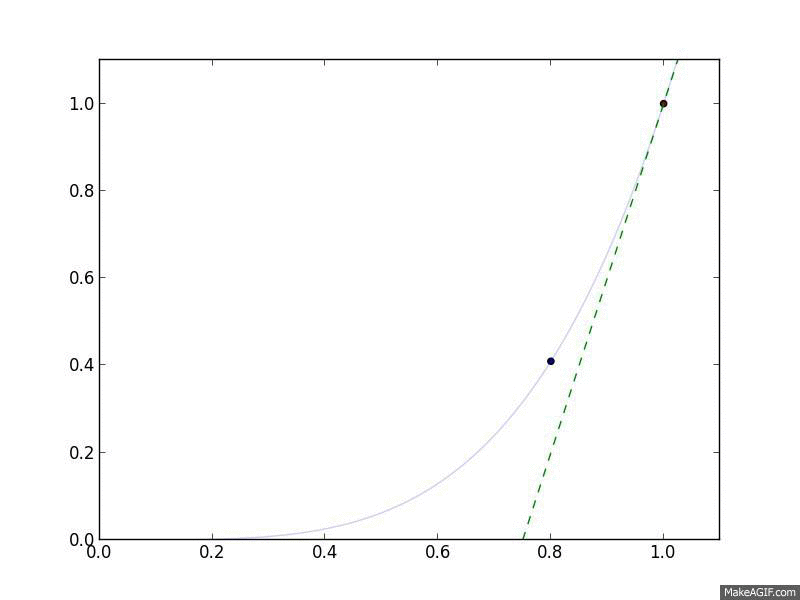

$$ \theta^{new} = \theta - \eta\nabla J(\theta)$$
Gradient Descent algorithm is a powerful optimization method for convex loss function. It updates the $\theta$ that has smaller loss than before. The new $\theta$ is calculated by subtracting the gradient of loss function $J$ with respect to $\theta$ multiplied by learning rate $\eta$ from its current values. $\theta^{new}$ converges to optimum value that minimize the loss function when you update the weight iteratively.

In [2]:
import torch
import numpy as np
from matplotlib import pyplot as plt

Now, let's get started to the real problem. We'll make the fourth order polynomial that has random weight. I already selected some random weights from random function so now, the line that returns the random weights is commented out. If you want to change the weight target, please comment out the third line and execute the second line of the cell.

`polynomial` function returns the y value about given polynomial parameter `W`. `@` means that the dot product between two tensor type values.

In [ ]:
degree = 4
#W_target = torch.rand(degree+1, 1) * 6
W_target = torch.tensor([[-5.8281],[1.3995],[-0.1853],[1.8064],[0.4474]])
print(W_target)

def polynomial(x, W):
  y = 0
  x_vec = torch.zeros(degree+1, 1)
  for i in range(degree+1):
    x_vec[i] = x ** i
  y = x_vec.t() @ W
  return y

print(polynomial(1,W_target))

Now, to construct the dataset, choose random `x` between `xlim`(upper and lower bound), and get `y` value of 4th order polynomial. And then add some noise to make harder finding the apropriate weight.

You can handle the number of data size, x limits. Next cell shows the created dataset on the graph.

In [4]:
data_size = 200
xlim = [-5, 5]
dataset = torch.zeros(data_size, 2)
for i in range(data_size):
  y = torch.zeros(1,1)
  x = torch.FloatTensor(1,1).uniform_(xlim[0], xlim[1])
  y = polynomial(x, W_target)
  dataset[i,:] = torch.cat((x, y), 1)


In [ ]:
plt.scatter(dataset[:,0].detach().numpy(), dataset[:,1].detach().numpy())
plt.show()

The loss function means that your estimated values are how close to your target values. In this example, we'll use the absolute distance between target and estimated value. 


In [20]:
def lossfn(tar,y):
  return (tar - y).abs()

This cell represents that the main code for estimating the polynomial parameters. At first reset the parameters in random manner, picking up a data from dataset and estimate the y value. The parameter is updated by the calculated gradient based on the loss function between target y and estimated y. You can see that the loss is decreased when iteration goes on.

In [ ]:
W = torch.randn(degree+1, 1, requires_grad=True)
for iter in range(100):
  for i in range(data_size):
    y_tar = dataset[i,1]
    x = dataset[i,0]
    y = polynomial(x, W)
    loss = lossfn(y_tar, y)
    loss.backward()
    with torch.no_grad():
      W -= 1e-5 * W.grad
      W.grad.zero_()

  if (iter+1) % 10 == 0:
    print("Loss: %.2f"%(loss.item()))

This cell shows the graphs of the estimated polynomial and target polynomial. They look similar.

In [ ]:
def draw(W, str):
  x = np.linspace(xlim[0], xlim[1], data_size)
  y = np.zeros(data_size)
  for i in range(data_size):
    y[i] = model(x[i], W).detach().numpy()
  plt.plot(x, y)
  plt.title(str)
  plt.show()

draw(W, 'estimated')
draw(W_target, 'target')

If you changes the target weight, polynomial degree, dataset size, x domain limits or learning rate etc., you will get numerous different results. Please change them and get some intuition about this regression problems.

I recommend you at least changing

1. learning rate
2. iteration number(we call it 'epoch')
3. dataset size

these three things. If you have any problems or questions please take them into TA sessions and have discussion with your classmates and TA.

In [ ]:
print("Estimated polynomial parmeters are", W.t().detach().numpy()[0])
print("Target polynomial parameters are", W_target.t().detach().numpy()[0])

Although their graphs look similar, their parameters look quite different. Because they have some noise in the data and there are similar polynomials in their x,y domain so they can shirink into local minimum.

Because this lecture covers the basic concepts of the regression so I won't introduce you how to optimize well(i.e. how to go to global optimum). However, there are so many fancy methods to finds the optimum value well based on gradient descent algorithm. Therefore, if you're interested in, please look for an optimization algorithm.